# 多重共線性とリッジ回帰

In [1]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

from simulator import Simulator

In [2]:
np.random.seed(42)

setting = {
    "style": "white",
    "palette": "deep",
    "font": "IPAexGothic",
    "rc": {
        "figure.dpi": 300,
        "figure.figsize": (6, 4),
        "axes.spines.right": False,
        "axes.spines.top": False,
        "axes.linewidth": 0.8,
        "axes.grid": True,
        "grid.color": ".8",
        "grid.linewidth": 0.5,
        "grid.linestyle": "dotted",
        "axes.edgecolor": ".3",
        "axes.labelcolor": ".3",
        "xtick.color": ".3",
        "ytick.color": ".3",
        "text.color": ".3",
        "figure.constrained_layout.use": True,
    },
}
sns.set(**setting)

warnings.simplefilter("ignore")

In [3]:
base_params = {
    "n_simulations": 2000,
    "n_samples": 100,
    "n_features": 3,
    "rho": 0.9,
    "sigma_e": 5,
}

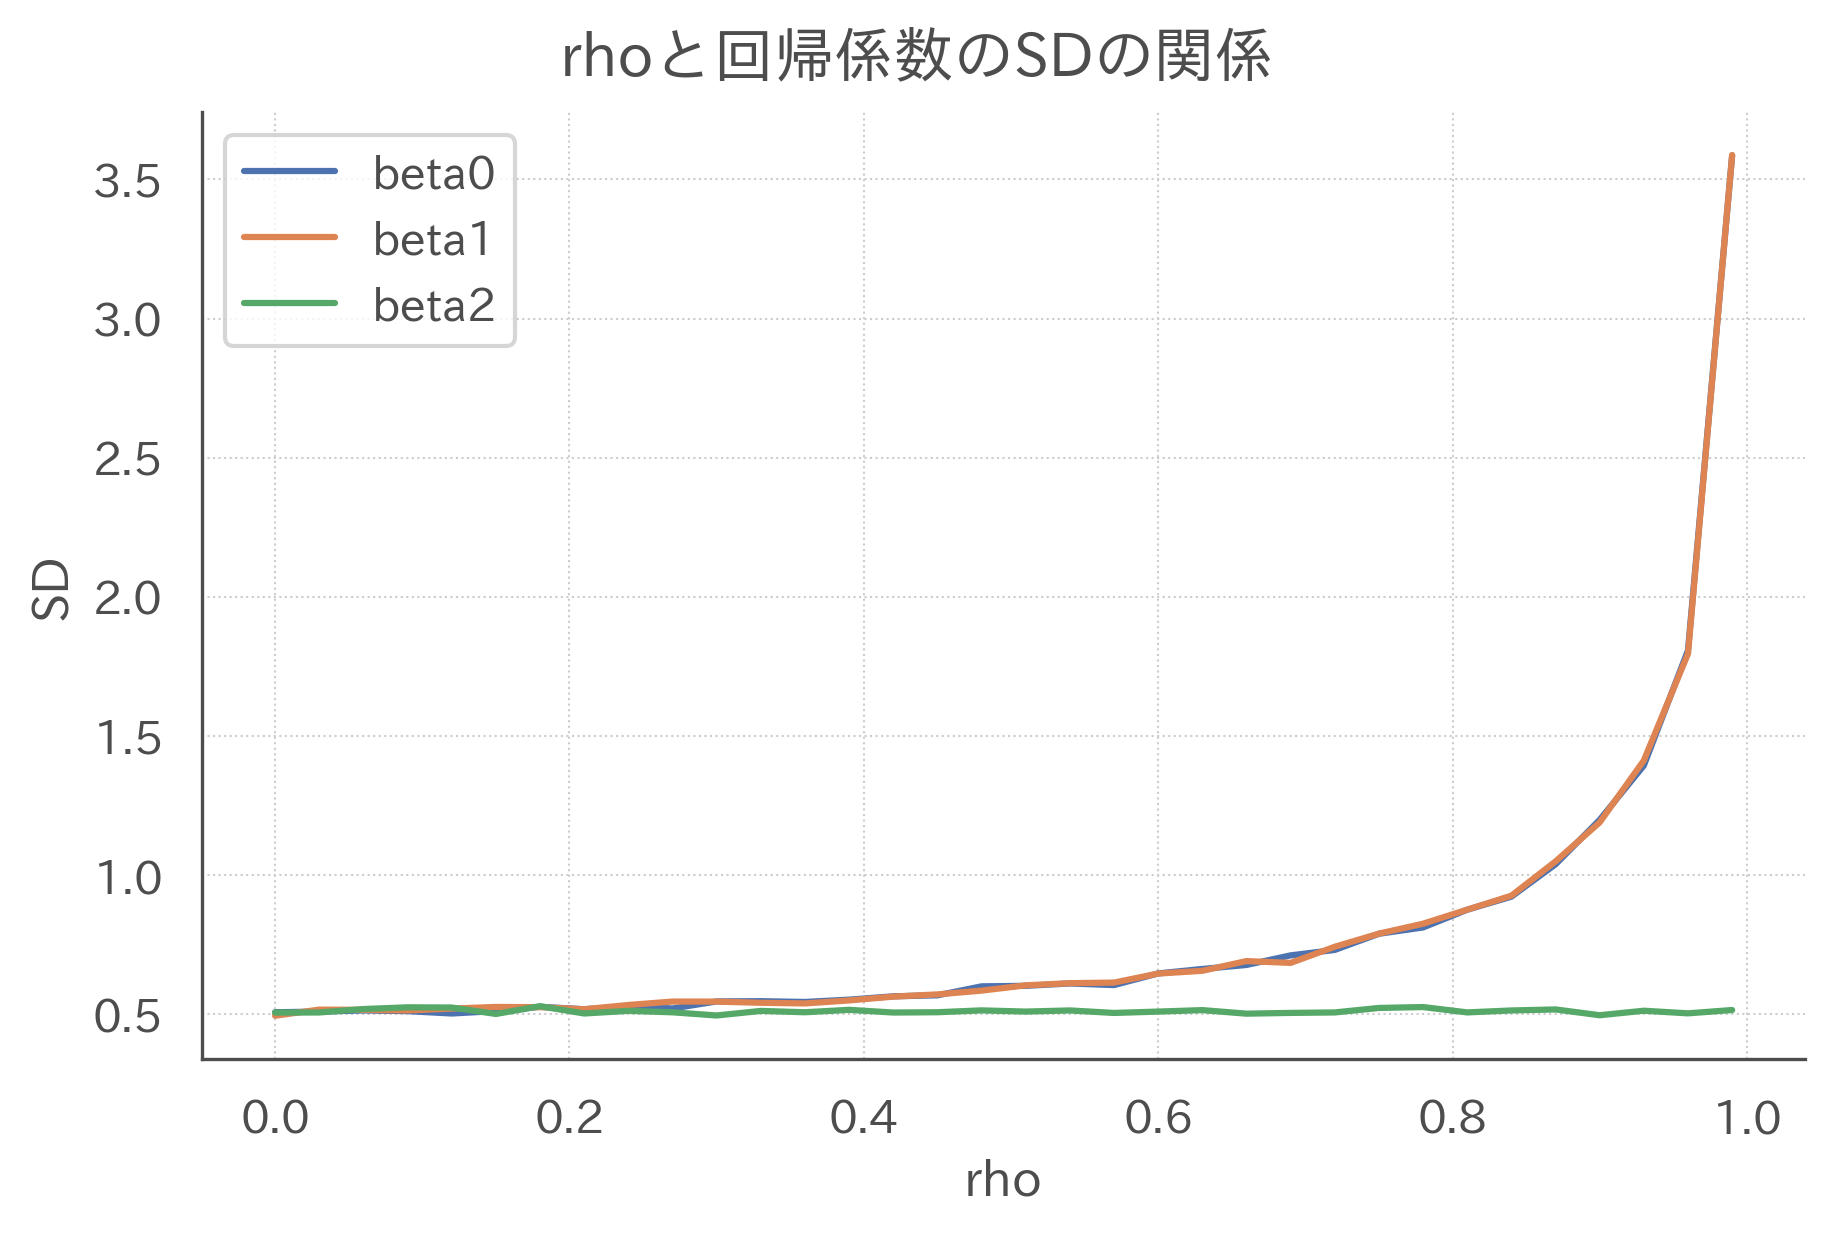

In [4]:
target_key = "rho"
target_values = np.arange(0, 1, 0.03).tolist()

s = Simulator(**base_params)
df = s.simulate(target_key, target_values, l2_lambda=0)
s.plot(df, target_key, "SD")

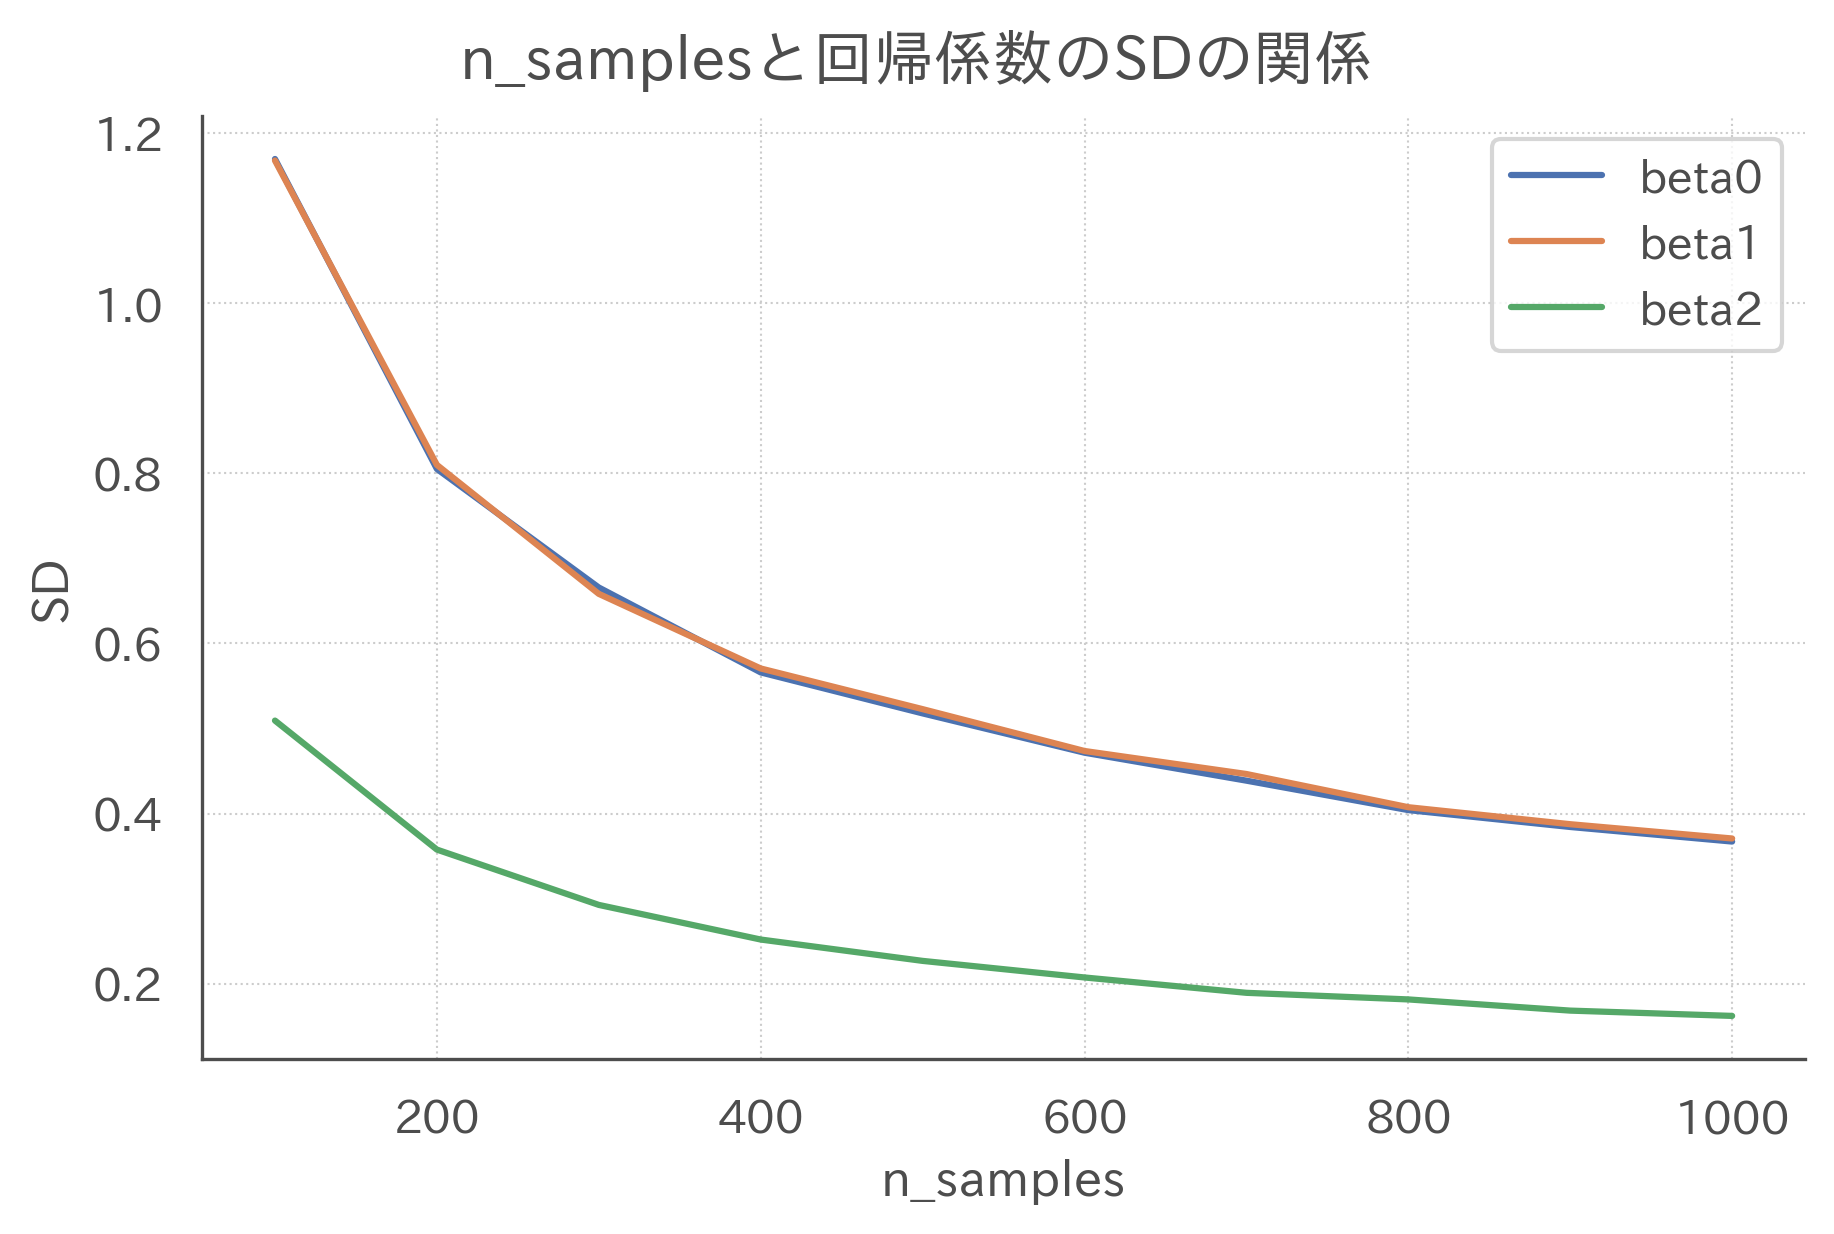

In [5]:
target_key = "n_samples"
target_values = np.arange(100, 1001, 100).tolist()

s = Simulator(**base_params)
df = s.simulate(target_key, target_values, l2_lambda=0)
s.plot(df, target_key, "SD")

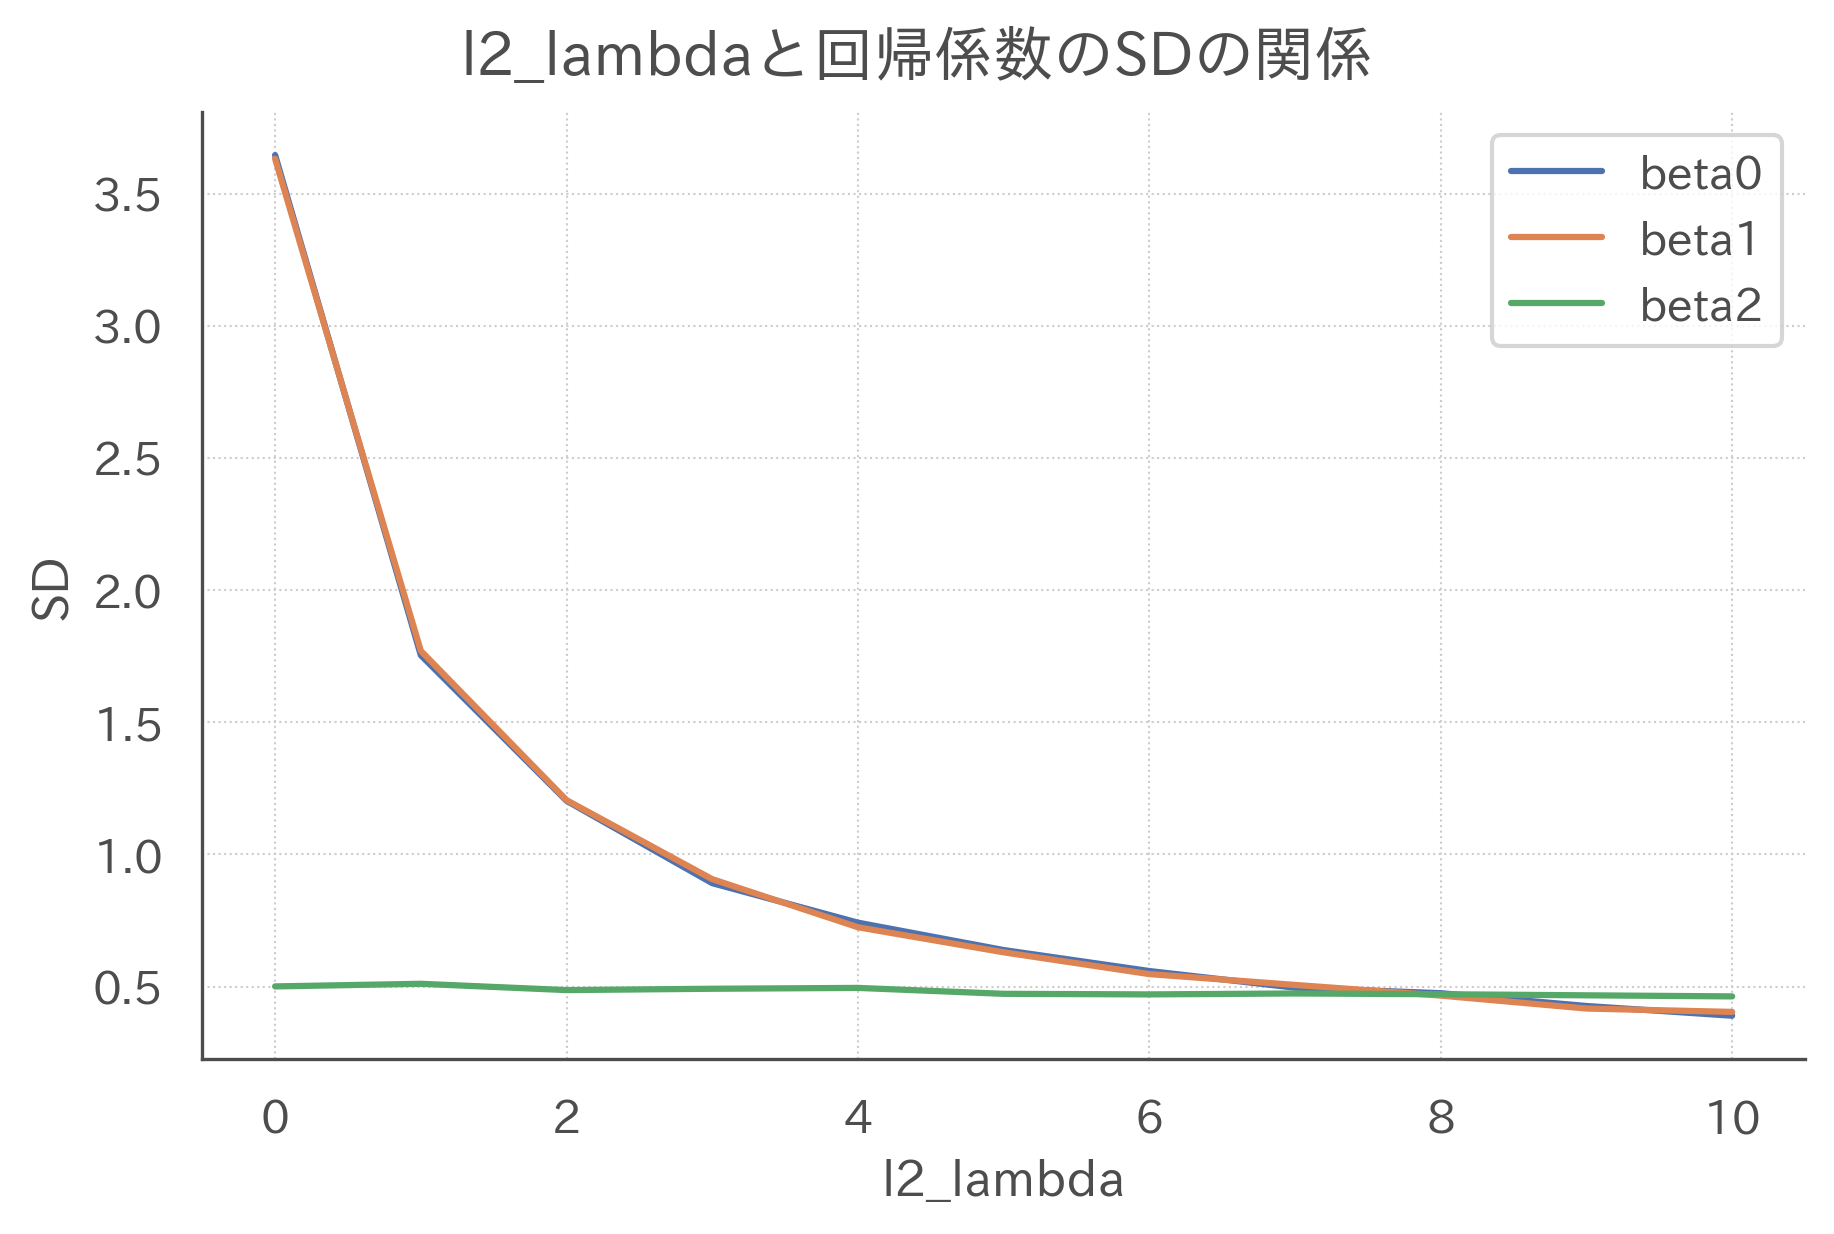

In [6]:
target_key = "rho"
target_values = [0.99]

s = Simulator(**base_params)
df = pd.concat([s.simulate(target_key, target_values, l2_lambda=l).assign(l2_lambda = l) for l in range(11)])
s.plot(df, "l2_lambda", "SD")

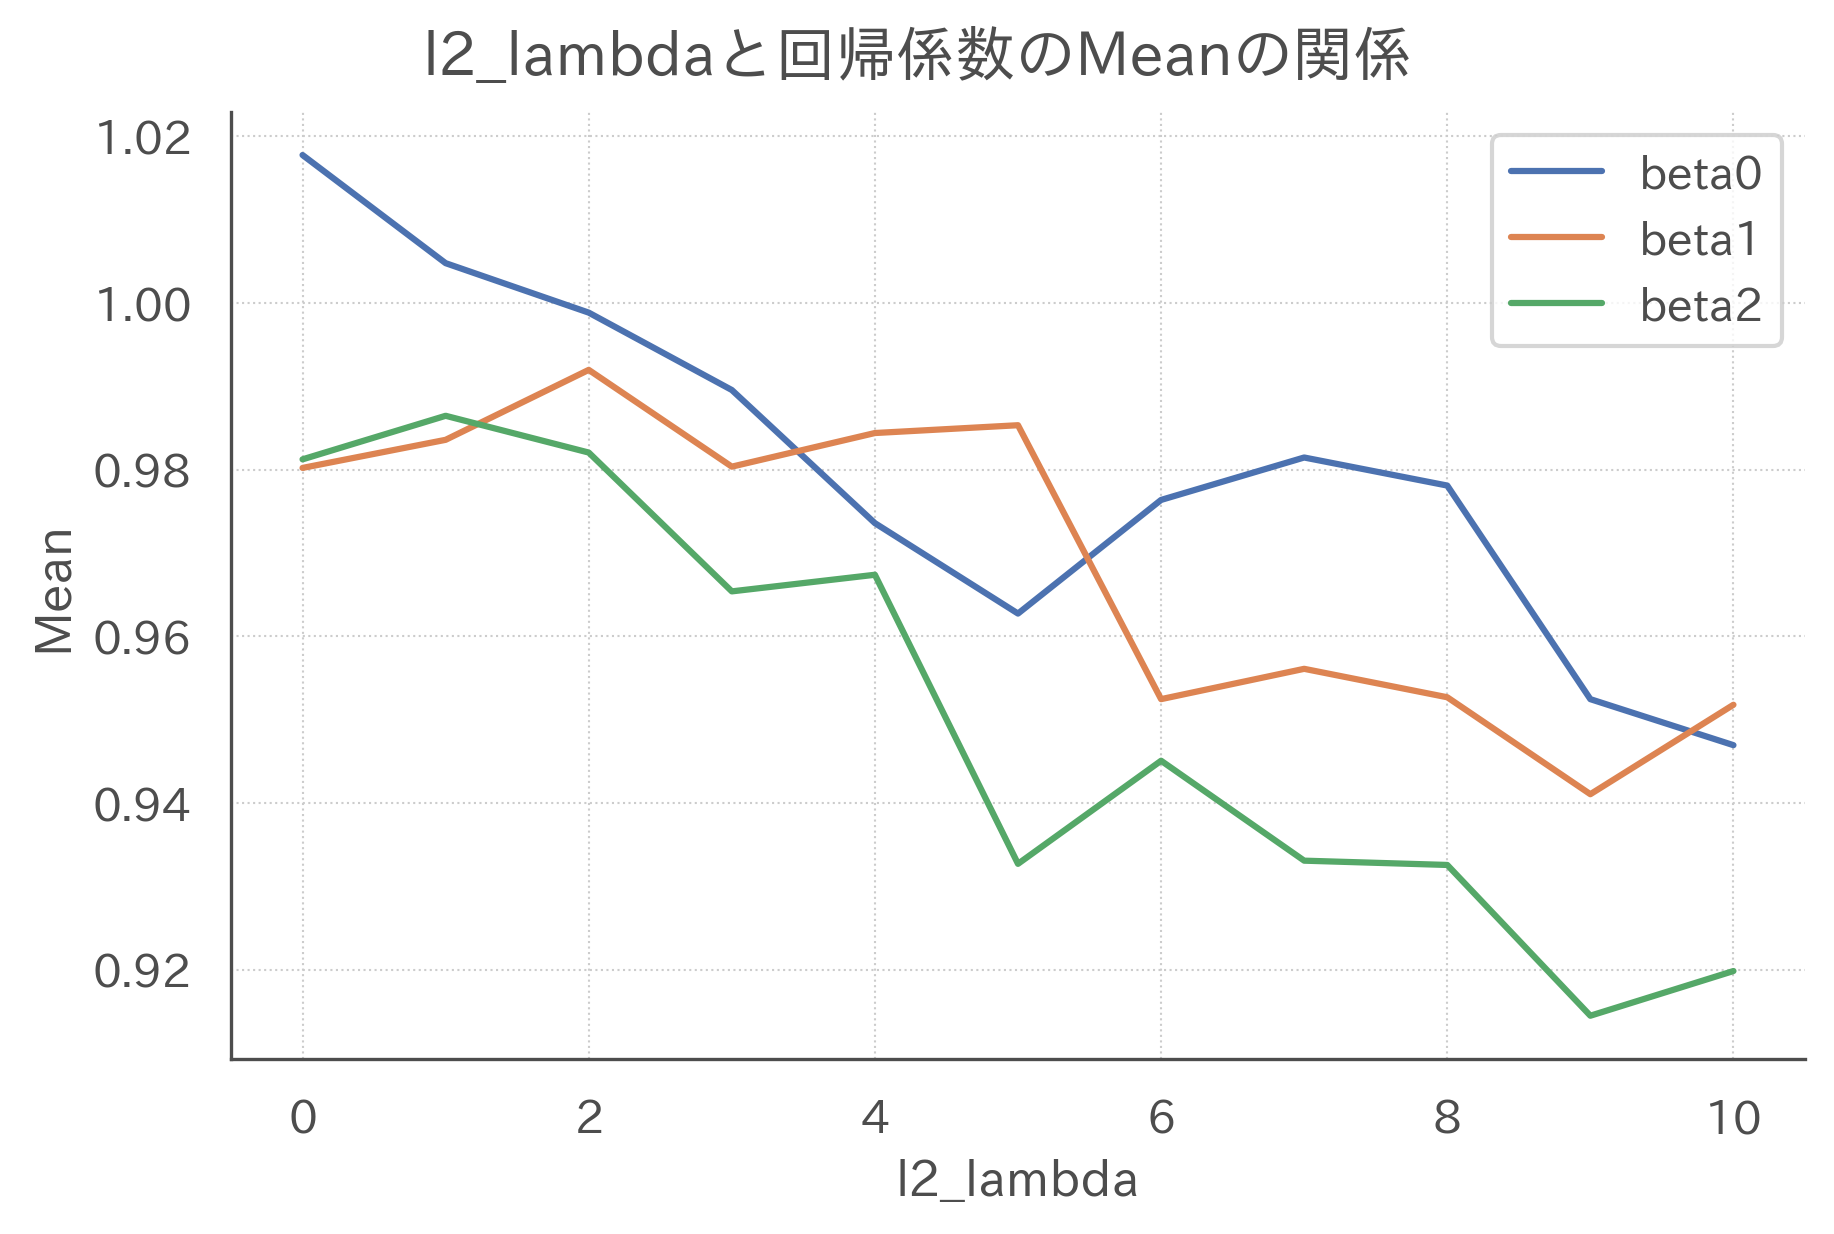

In [7]:
s.plot(df, "l2_lambda", "Mean")